# Introducción

*   Se presenta como problemática la clasificación de flores, explicitamente de tres tipos: Iris Setosa, Iris Virginica e Iris Versicolor.
*   El objetivo del laboratorio es diseñar un clasificador neuronal poco profundo que permita identificar que tipo de flor es en base a cuatro caracteristicas, a saber, largo del sepalo, ancho del sepalo, largo del petalo y ancho del petalo


# Experimentos

*   Se utilizará la base de datos iris.csv 
*   Carga de datos
*   Separacion de los datos: Conjunto de entrenamiento, conjunto de prueba y conjunto de validación
*   Diseño del modelo
* Entrenamiento
* Validación

## Carga de la base de datos

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


## Diseño del modelo propuesto

Se presenta una red neuronal poco profunda que cuenta con 3 capas (Ver Tabla 1), la primera capa cuenta con 4 entradas de acuerdo a la cantidad de caracteristicas de entrada que nos proporciona la base de datos, el numero de salidas de dicha capa se fundamenta en la cantidad de observaciones del conjunto de entrenamiento. La segunda es una capa oculta que tiene como entrada la salida de la capa anterior y el numero de salidas corresponde a $y_h=x_i\sqrt{x_h *y_f}$ donde $x_h$ es la cantidad de entradas para la capa oculta, $y_f$ la cantidad de salidas de la capa siguiente y $x_i$ la cantidad de entradas iniciales.
<table 
  <tr>
    <th></th>
    <th>Capa 1</th>
    <th>Capa 2</th>
    <th>Capa 3</th>
  </tr>
  <tr>
    <th>N Entradas</th>
    <td>4</td>
    <td>84</td>
    <td>37</td>
  </tr>
  <tr>
    <th>N Salidas</th>
    <td>84</td>
    <td>37</td>
    <td>3</td>
  </tr>
</table>
<center>Tabla 1 .- Capas</center>

## Parámetros y configuración del modelo

* Funcion de Activacion: Relu
* Funcion de Perdida: Cross-Entropy
* Optimizador: Adam
* Tasa de aprendizaje: 0.001


cargar tensores

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))

Tesla V100-SXM2-16GB


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))
torch.cuda.empty_cache()

Tesla V100-SXM2-16GB


In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_train/y1_train_tensorp2.pt')


CPU times: user 3.86 s, sys: 3.32 s, total: 7.18 s
Wall time: 15.8 s
CPU times: user 518 ms, sys: 1.11 s, total: 1.63 s
Wall time: 18.9 s
CPU times: user 498 ms, sys: 1.21 s, total: 1.71 s
Wall time: 24.9 s
CPU times: user 3.2 ms, sys: 73 µs, total: 3.28 ms
Wall time: 896 ms
CPU times: user 2.69 ms, sys: 574 µs, total: 3.26 ms
Wall time: 471 ms
CPU times: user 1.91 ms, sys: 828 µs, total: 2.74 ms
Wall time: 416 ms


In [ ]:
print(f'{X1_trainp1.shape} {y1_trainp1.shape}')
print(f'{X1_trainp2.shape} {y1_trainp2.shape}')
print(f'{X1_trainp3.shape} {y1_trainp3.shape}')

torch.Size([25000, 20000]) torch.Size([25000, 1])
torch.Size([25000, 20000]) torch.Size([25000, 1])
torch.Size([23783, 20000]) torch.Size([23783, 1])


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
def crearModelo():
  K.clear_session( )
  model = Sequential()
  model.add(Dense(64,  activation='relu'))
  model.add(Dense(2,  activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  return model

# Pruebas y validación

Del conjunto de datos se tiene un total de 150 observaciones, de estas se separan en tres nuevos conjuntos; conjunto de entrenamiento 84 observaciones, conjunto de prueba 30 observaciones y conjunto de validacion 36 observaciones, correspondiendo a un 56%,  20% y 24% respectivamente.

In [ ]:
print(X1_trainp1.shape)
print(X1_trainp2.shape)
print(X1_trainp3.shape)

torch.Size([25000, 20000])
torch.Size([25000, 20000])
torch.Size([23783, 20000])


In [ ]:
print(y1_trainp1.shape)
print(y1_trainp2.shape)
print(y1_trainp3.shape)

torch.Size([25000, 1])
torch.Size([25000, 1])
torch.Size([23783, 1])


In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)





####Modelo 1

In [ ]:
modelo1  = crearModelo()

In [ ]:
history = modelo1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.3339 - categorical_accuracy: 0.8600
Epoch 2/10
782/782 - 2s - loss: 0.1470 - categorical_accuracy: 0.9454
Epoch 3/10
782/782 - 3s - loss: 0.0940 - categorical_accuracy: 0.9677
Epoch 4/10
782/782 - 3s - loss: 0.0645 - categorical_accuracy: 0.9780
Epoch 5/10
782/782 - 3s - loss: 0.0452 - categorical_accuracy: 0.9850
Epoch 6/10
782/782 - 3s - loss: 0.0322 - categorical_accuracy: 0.9897
Epoch 7/10
782/782 - 3s - loss: 0.0222 - categorical_accuracy: 0.9932
Epoch 8/10
782/782 - 3s - loss: 0.0159 - categorical_accuracy: 0.9956
Epoch 9/10
782/782 - 3s - loss: 0.0110 - categorical_accuracy: 0.9968
Epoch 10/10
782/782 - 3s - loss: 0.0073 - categorical_accuracy: 0.9980


In [ ]:
history = modelo1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.2471 - categorical_accuracy: 0.9104
Epoch 2/10
782/782 - 3s - loss: 0.1091 - categorical_accuracy: 0.9596
Epoch 3/10
782/782 - 3s - loss: 0.0682 - categorical_accuracy: 0.9757
Epoch 4/10
782/782 - 3s - loss: 0.0438 - categorical_accuracy: 0.9856
Epoch 5/10
782/782 - 3s - loss: 0.0287 - categorical_accuracy: 0.9906
Epoch 6/10
782/782 - 3s - loss: 0.0190 - categorical_accuracy: 0.9930
Epoch 7/10
782/782 - 3s - loss: 0.0131 - categorical_accuracy: 0.9950
Epoch 8/10
782/782 - 3s - loss: 0.0094 - categorical_accuracy: 0.9960
Epoch 9/10
782/782 - 3s - loss: 0.0073 - categorical_accuracy: 0.9964
Epoch 10/10
782/782 - 3s - loss: 0.0058 - categorical_accuracy: 0.9968


In [ ]:
history = modelo1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 3s - loss: 0.2138 - categorical_accuracy: 0.9268
Epoch 2/10
744/744 - 3s - loss: 0.0884 - categorical_accuracy: 0.9681
Epoch 3/10
744/744 - 3s - loss: 0.0510 - categorical_accuracy: 0.9841
Epoch 4/10
744/744 - 3s - loss: 0.0319 - categorical_accuracy: 0.9905
Epoch 5/10
744/744 - 3s - loss: 0.0210 - categorical_accuracy: 0.9936
Epoch 6/10
744/744 - 3s - loss: 0.0144 - categorical_accuracy: 0.9956
Epoch 7/10
744/744 - 3s - loss: 0.0101 - categorical_accuracy: 0.9965
Epoch 8/10
744/744 - 3s - loss: 0.0074 - categorical_accuracy: 0.9970
Epoch 9/10
744/744 - 3s - loss: 0.0056 - categorical_accuracy: 0.9973
Epoch 10/10
744/744 - 3s - loss: 0.0044 - categorical_accuracy: 0.9978


In [ ]:
modelo1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain40.h5')

checkpoint

In [2]:
from keras.models import load_model
modelo1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain40.h5')

In [3]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.18 s, sys: 1.4 s, total: 2.58 s
Wall time: 9.9 s
CPU times: user 216 ms, sys: 468 ms, total: 684 ms
Wall time: 7.57 s
CPU times: user 277 ms, sys: 928 ms, total: 1.21 s
Wall time: 11.3 s
CPU times: user 5.22 ms, sys: 1.04 ms, total: 6.25 ms
Wall time: 381 ms
CPU times: user 4.72 ms, sys: 0 ns, total: 4.72 ms
Wall time: 381 ms
CPU times: user 7.28 ms, sys: 0 ns, total: 7.28 ms
Wall time: 343 ms
CPU times: user 74.6 ms, sys: 777 ms, total: 852 ms
Wall time: 13.2 s
CPU times: user 50 ms, sys: 1.16 s, total: 1.21 s
Wall time: 13 s
CPU times: user 56.8 ms, sys: 1.1 s, total: 1.15 s
Wall time: 12.1 s
CPU times: user 0 ns, sys: 5.31 ms, total: 5.31 ms
Wall time: 355 ms
CPU times: user 1.94 ms, sys: 2.72 ms, total: 4.66 ms
Wall time: 341 ms
CPU times: user 4.19 ms, sys: 156 µs, total: 4.35 ms
Wall time: 323 ms


In [4]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
modelo1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
modelo1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
modelo1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 4s - loss: 0.2955 - categorical_accuracy: 0.9361 - 4s/epoch - 8ms/step
469/469 - 2s - loss: 0.3150 - categorical_accuracy: 0.9363 - 2s/epoch - 3ms/step
475/475 - 2s - loss: 0.2951 - categorical_accuracy: 0.9369 - 2s/epoch - 3ms/step


[0.29509201645851135, 0.9369316101074219]

In [6]:
modelo1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain40PostEvaluate.h5')

#####Probando en cada muestra

In [1]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain40PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.55 s, sys: 1.39 s, total: 2.94 s
Wall time: 5.61 s
CPU times: user 236 ms, sys: 504 ms, total: 741 ms
Wall time: 2.28 s
CPU times: user 210 ms, sys: 970 ms, total: 1.18 s
Wall time: 2.71 s
CPU times: user 1.48 ms, sys: 679 µs, total: 2.16 ms
Wall time: 2.8 ms
CPU times: user 1.32 ms, sys: 86 µs, total: 1.4 ms
Wall time: 6.48 ms
CPU times: user 747 µs, sys: 0 ns, total: 747 µs
Wall time: 1.92 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 5s - 5s/epoch - 5ms/step
31622
acc: 0.9365315286825627
precision: 0.9355977543261679
recall: 0.9330202449931468
f1: 0.9365315286825627


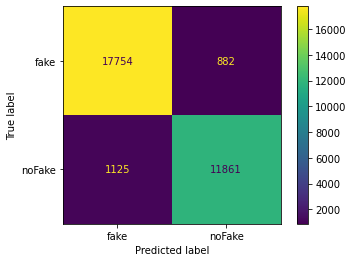

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [4]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.21 s, sys: 1.42 s, total: 2.64 s
Wall time: 10.9 s
CPU times: user 212 ms, sys: 484 ms, total: 697 ms
Wall time: 5.33 s
CPU times: user 238 ms, sys: 880 ms, total: 1.12 s
Wall time: 7.81 s
CPU times: user 3.57 ms, sys: 930 µs, total: 4.5 ms
Wall time: 342 ms
CPU times: user 3.61 ms, sys: 104 µs, total: 3.71 ms
Wall time: 322 ms
CPU times: user 3.29 ms, sys: 1.59 ms, total: 4.88 ms
Wall time: 344 ms


In [5]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9459237239896274
precision: 0.9447828240394601
recall: 0.9433583550789767
f1: 0.9459237239896274


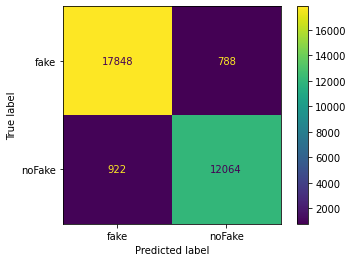

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m1.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.64 s, sys: 1.41 s, total: 3.05 s
Wall time: 9.96 s
CPU times: user 227 ms, sys: 474 ms, total: 701 ms
Wall time: 6.59 s
CPU times: user 252 ms, sys: 944 ms, total: 1.2 s
Wall time: 7.53 s
CPU times: user 4.25 ms, sys: 443 µs, total: 4.69 ms
Wall time: 315 ms
CPU times: user 4.94 ms, sys: 0 ns, total: 4.94 ms
Wall time: 359 ms
CPU times: user 3.96 ms, sys: 0 ns, total: 3.96 ms
Wall time: 342 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9471254190120802
precision: 0.9459875674384361
recall: 0.9446463710303767
f1: 0.9471254190120802


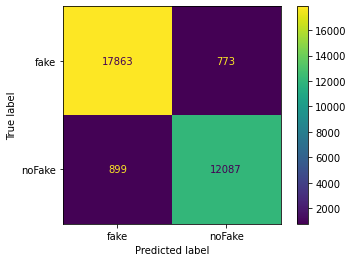

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m1.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


####Modelo 2

In [ ]:
modelo2  = crearModelo()

In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_train/y2_train_tensorp2.pt')

CPU times: user 491 ms, sys: 1.9 s, total: 2.39 s
Wall time: 9.74 s
CPU times: user 497 ms, sys: 1.14 s, total: 1.64 s
Wall time: 24 s
CPU times: user 466 ms, sys: 1.11 s, total: 1.57 s
Wall time: 28 s
CPU times: user 2.8 ms, sys: 837 µs, total: 3.64 ms
Wall time: 1.25 s
CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 430 ms
CPU times: user 2.82 ms, sys: 0 ns, total: 2.82 ms
Wall time: 421 ms


In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)

In [ ]:
history = modelo2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.3356 - categorical_accuracy: 0.8558
Epoch 2/10
782/782 - 4s - loss: 0.1473 - categorical_accuracy: 0.9469
Epoch 3/10
782/782 - 3s - loss: 0.0944 - categorical_accuracy: 0.9671
Epoch 4/10
782/782 - 3s - loss: 0.0641 - categorical_accuracy: 0.9780
Epoch 5/10
782/782 - 3s - loss: 0.0447 - categorical_accuracy: 0.9847
Epoch 6/10
782/782 - 3s - loss: 0.0304 - categorical_accuracy: 0.9908
Epoch 7/10
782/782 - 3s - loss: 0.0207 - categorical_accuracy: 0.9937
Epoch 8/10
782/782 - 3s - loss: 0.0142 - categorical_accuracy: 0.9957
Epoch 9/10
782/782 - 3s - loss: 0.0096 - categorical_accuracy: 0.9972
Epoch 10/10
782/782 - 3s - loss: 0.0067 - categorical_accuracy: 0.9981


In [ ]:
history = modelo2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.2498 - categorical_accuracy: 0.9095
Epoch 2/10
782/782 - 3s - loss: 0.1149 - categorical_accuracy: 0.9560
Epoch 3/10
782/782 - 3s - loss: 0.0728 - categorical_accuracy: 0.9744
Epoch 4/10
782/782 - 3s - loss: 0.0473 - categorical_accuracy: 0.9848
Epoch 5/10
782/782 - 3s - loss: 0.0312 - categorical_accuracy: 0.9898
Epoch 6/10
782/782 - 3s - loss: 0.0211 - categorical_accuracy: 0.9928
Epoch 7/10
782/782 - 3s - loss: 0.0147 - categorical_accuracy: 0.9954
Epoch 8/10
782/782 - 3s - loss: 0.0104 - categorical_accuracy: 0.9960
Epoch 9/10
782/782 - 3s - loss: 0.0078 - categorical_accuracy: 0.9968
Epoch 10/10
782/782 - 3s - loss: 0.0061 - categorical_accuracy: 0.9974


In [ ]:
history = modelo2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 3s - loss: 0.2103 - categorical_accuracy: 0.9304
Epoch 2/10
744/744 - 3s - loss: 0.0866 - categorical_accuracy: 0.9701
Epoch 3/10
744/744 - 3s - loss: 0.0505 - categorical_accuracy: 0.9833
Epoch 4/10
744/744 - 3s - loss: 0.0323 - categorical_accuracy: 0.9900
Epoch 5/10
744/744 - 3s - loss: 0.0218 - categorical_accuracy: 0.9928
Epoch 6/10
744/744 - 3s - loss: 0.0154 - categorical_accuracy: 0.9946
Epoch 7/10
744/744 - 3s - loss: 0.0113 - categorical_accuracy: 0.9957
Epoch 8/10
744/744 - 3s - loss: 0.0087 - categorical_accuracy: 0.9964
Epoch 9/10
744/744 - 3s - loss: 0.0069 - categorical_accuracy: 0.9969
Epoch 10/10
744/744 - 3s - loss: 0.0056 - categorical_accuracy: 0.9974


In [ ]:
modelo2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain40.h5')

In [2]:
from keras.models import load_model
modelo2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain40.h5')

In [3]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.35 s, sys: 1.37 s, total: 2.72 s
Wall time: 17.4 s
CPU times: user 256 ms, sys: 456 ms, total: 711 ms
Wall time: 11 s
CPU times: user 257 ms, sys: 905 ms, total: 1.16 s
Wall time: 15.1 s
CPU times: user 5.85 ms, sys: 1.33 ms, total: 7.17 ms
Wall time: 886 ms
CPU times: user 5.97 ms, sys: 1.79 ms, total: 7.76 ms
Wall time: 1.06 s
CPU times: user 5.31 ms, sys: 1.03 ms, total: 6.34 ms
Wall time: 929 ms
CPU times: user 66 ms, sys: 848 ms, total: 914 ms
Wall time: 16 s
CPU times: user 41.3 ms, sys: 1.28 s, total: 1.32 s
Wall time: 20 s
CPU times: user 40.4 ms, sys: 1.12 s, total: 1.16 s
Wall time: 15.7 s
CPU times: user 5.79 ms, sys: 407 µs, total: 6.2 ms
Wall time: 954 ms
CPU times: user 4.98 ms, sys: 1.6 ms, total: 6.58 ms
Wall time: 913 ms
CPU times: user 5.32 ms, sys: 1.29 ms, total: 6.61 ms
Wall time: 886 ms


In [4]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
modelo2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
modelo2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
modelo2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 3s - loss: 0.3162 - categorical_accuracy: 0.9354 - 3s/epoch - 7ms/step
469/469 - 1s - loss: 0.2905 - categorical_accuracy: 0.9392 - 1s/epoch - 3ms/step
475/475 - 2s - loss: 0.3127 - categorical_accuracy: 0.9344 - 2s/epoch - 5ms/step


[0.31265828013420105, 0.9343613982200623]

In [6]:
modelo2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain40PostEvaluate.h5')

#####Probando en cada muestra

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain40PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.2 s, sys: 1.31 s, total: 2.51 s
Wall time: 14.8 s
CPU times: user 231 ms, sys: 491 ms, total: 722 ms
Wall time: 13.1 s
CPU times: user 270 ms, sys: 920 ms, total: 1.19 s
Wall time: 15.8 s
CPU times: user 5.6 ms, sys: 37.5 ms, total: 43.1 ms
Wall time: 1.41 s
CPU times: user 4.55 ms, sys: 1.38 ms, total: 5.94 ms
Wall time: 868 ms
CPU times: user 5.15 ms, sys: 1.71 ms, total: 6.85 ms
Wall time: 1.02 s


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9462083359686294
precision: 0.9446995236467892
recall: 0.9441017712968218
f1: 0.9462083359686294


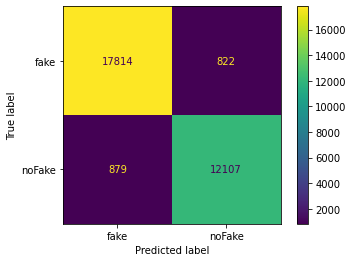

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m2.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.65 s, sys: 1.34 s, total: 2.99 s
Wall time: 7.77 s
CPU times: user 226 ms, sys: 427 ms, total: 653 ms
Wall time: 4.45 s
CPU times: user 225 ms, sys: 842 ms, total: 1.07 s
Wall time: 4.01 s
CPU times: user 2.53 ms, sys: 193 µs, total: 2.73 ms
Wall time: 4.87 ms
CPU times: user 1.51 ms, sys: 0 ns, total: 1.51 ms
Wall time: 2.49 ms
CPU times: user 1.23 ms, sys: 66 µs, total: 1.3 ms
Wall time: 2.04 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9337802795522104
precision: 0.931795575736226
recall: 0.9313280797353148
f1: 0.9337802795522104


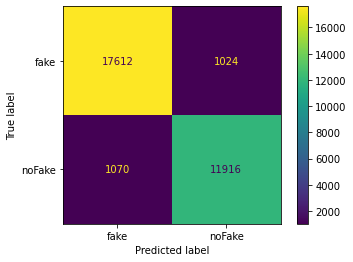

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.36 s, sys: 1.3 s, total: 2.66 s
Wall time: 13.3 s
CPU times: user 224 ms, sys: 523 ms, total: 747 ms
Wall time: 9.81 s
CPU times: user 248 ms, sys: 915 ms, total: 1.16 s
Wall time: 13.1 s
CPU times: user 6.97 ms, sys: 317 µs, total: 7.29 ms
Wall time: 938 ms
CPU times: user 6.56 ms, sys: 411 µs, total: 6.97 ms
Wall time: 964 ms
CPU times: user 6.03 ms, sys: 877 µs, total: 6.91 ms
Wall time: 921 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9475681487571943
precision: 0.946006238978604
recall: 0.9456289951101269
f1: 0.9475681487571943


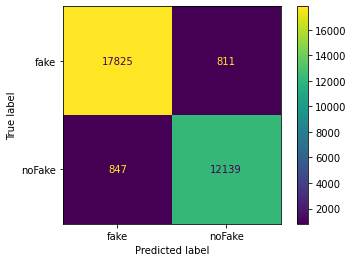

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m2.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


####Modelo 3

In [ ]:
modelo3  = crearModelo()

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_train/y3_train_tensorp2.pt')

CPU times: user 518 ms, sys: 1.92 s, total: 2.44 s
Wall time: 9.75 s
CPU times: user 547 ms, sys: 1.07 s, total: 1.61 s
Wall time: 26.3 s
CPU times: user 514 ms, sys: 1.1 s, total: 1.61 s
Wall time: 25.1 s
CPU times: user 2.35 ms, sys: 889 µs, total: 3.24 ms
Wall time: 807 ms
CPU times: user 1.92 ms, sys: 726 µs, total: 2.65 ms
Wall time: 445 ms
CPU times: user 2.38 ms, sys: 259 µs, total: 2.64 ms
Wall time: 428 ms


In [ ]:
print(X3_trainp1.shape)
print(X3_trainp2.shape)
print(X3_trainp3.shape)

torch.Size([25000, 20000])
torch.Size([25000, 20000])
torch.Size([23783, 20000])


In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)

In [ ]:
history = modelo3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.3355 - categorical_accuracy: 0.8605
Epoch 2/10
782/782 - 2s - loss: 0.1479 - categorical_accuracy: 0.9470
Epoch 3/10
782/782 - 2s - loss: 0.0933 - categorical_accuracy: 0.9680
Epoch 4/10
782/782 - 2s - loss: 0.0642 - categorical_accuracy: 0.9792
Epoch 5/10
782/782 - 2s - loss: 0.0445 - categorical_accuracy: 0.9853
Epoch 6/10
782/782 - 2s - loss: 0.0312 - categorical_accuracy: 0.9900
Epoch 7/10
782/782 - 2s - loss: 0.0220 - categorical_accuracy: 0.9931
Epoch 8/10
782/782 - 2s - loss: 0.0152 - categorical_accuracy: 0.9950
Epoch 9/10
782/782 - 3s - loss: 0.0106 - categorical_accuracy: 0.9973
Epoch 10/10
782/782 - 4s - loss: 0.0074 - categorical_accuracy: 0.9981


In [ ]:
history = modelo3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.2486 - categorical_accuracy: 0.9110
Epoch 2/10
782/782 - 4s - loss: 0.1122 - categorical_accuracy: 0.9573
Epoch 3/10
782/782 - 4s - loss: 0.0698 - categorical_accuracy: 0.9753
Epoch 4/10
782/782 - 4s - loss: 0.0446 - categorical_accuracy: 0.9848
Epoch 5/10
782/782 - 4s - loss: 0.0287 - categorical_accuracy: 0.9905
Epoch 6/10
782/782 - 4s - loss: 0.0190 - categorical_accuracy: 0.9929
Epoch 7/10
782/782 - 4s - loss: 0.0130 - categorical_accuracy: 0.9955
Epoch 8/10
782/782 - 4s - loss: 0.0093 - categorical_accuracy: 0.9974
Epoch 9/10
782/782 - 4s - loss: 0.0069 - categorical_accuracy: 0.9979
Epoch 10/10
782/782 - 4s - loss: 0.0054 - categorical_accuracy: 0.9983


In [ ]:
history = modelo3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 3s - loss: 0.2103 - categorical_accuracy: 0.9270
Epoch 2/10
744/744 - 3s - loss: 0.0865 - categorical_accuracy: 0.9680
Epoch 3/10
744/744 - 3s - loss: 0.0496 - categorical_accuracy: 0.9836
Epoch 4/10
744/744 - 3s - loss: 0.0307 - categorical_accuracy: 0.9916
Epoch 5/10
744/744 - 3s - loss: 0.0201 - categorical_accuracy: 0.9943
Epoch 6/10
744/744 - 3s - loss: 0.0135 - categorical_accuracy: 0.9960
Epoch 7/10
744/744 - 3s - loss: 0.0096 - categorical_accuracy: 0.9968
Epoch 8/10
744/744 - 3s - loss: 0.0071 - categorical_accuracy: 0.9974
Epoch 9/10
744/744 - 3s - loss: 0.0055 - categorical_accuracy: 0.9976
Epoch 10/10
744/744 - 3s - loss: 0.0043 - categorical_accuracy: 0.9979


In [ ]:
modelo3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain40.h5')

In [1]:
from keras.models import load_model
modelo3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain40.h5')

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.51 s, sys: 1.37 s, total: 2.88 s
Wall time: 6.28 s
CPU times: user 182 ms, sys: 492 ms, total: 674 ms
Wall time: 3.42 s
CPU times: user 255 ms, sys: 834 ms, total: 1.09 s
Wall time: 3.5 s
CPU times: user 2.48 ms, sys: 627 µs, total: 3.11 ms
Wall time: 8.89 ms
CPU times: user 1.08 ms, sys: 876 µs, total: 1.95 ms
Wall time: 3.03 ms
CPU times: user 857 µs, sys: 926 µs, total: 1.78 ms
Wall time: 3.03 ms
CPU times: user 103 ms, sys: 1.18 s, total: 1.28 s
Wall time: 17.9 s
CPU times: user 101 ms, sys: 1.08 s, total: 1.18 s
Wall time: 20.5 s
CPU times: user 82.2 ms, sys: 1.14 s, total: 1.22 s
Wall time: 16.5 s
CPU times: user 6.87 ms, sys: 0 ns, total: 6.87 ms
Wall time: 905 ms
CPU times: user 5.45 ms, sys: 0 ns, total: 5.45 ms
Wall time: 886 ms
CPU times: user 4.29 ms, sys: 1.52 ms, total: 5.82 ms
Wall time: 930 ms


In [ ]:
print(X3_valp1.shape)
print(X3_valp2.shape)
print(X3_valp3.shape)
print(X3_testp1.shape)
print(X3_testp2.shape)
print(X3_testp3.shape)

torch.Size([15000, 20000])
torch.Size([15000, 20000])
torch.Size([15174, 20000])
torch.Size([10000, 20000])
torch.Size([10000, 20000])
torch.Size([11622, 20000])


In [3]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [4]:
#validacion
import numpy as np
modelo3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
modelo3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
modelo3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 3s - loss: 0.3077 - categorical_accuracy: 0.9339 - 3s/epoch - 7ms/step
469/469 - 1s - loss: 0.3190 - categorical_accuracy: 0.9338 - 1s/epoch - 3ms/step
475/475 - 1s - loss: 0.3146 - categorical_accuracy: 0.9317 - 1s/epoch - 3ms/step


[0.31459474563598633, 0.9317253232002258]

In [5]:
modelo3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain40PostEvaluate.h5')

#####Probando en cada muestra

In [1]:

from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain40PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.58 s, sys: 1.36 s, total: 2.94 s
Wall time: 6.41 s
CPU times: user 223 ms, sys: 465 ms, total: 688 ms
Wall time: 2.84 s
CPU times: user 230 ms, sys: 980 ms, total: 1.21 s
Wall time: 3.81 s
CPU times: user 1.8 ms, sys: 0 ns, total: 1.8 ms
Wall time: 3.04 ms
CPU times: user 1.26 ms, sys: 145 µs, total: 1.41 ms
Wall time: 2.48 ms
CPU times: user 1.13 ms, sys: 94 µs, total: 1.22 ms
Wall time: 1.94 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 5s - 5s/epoch - 5ms/step
31622
acc: 0.9440263107962811
precision: 0.9431556216738305
recall: 0.9410131552506212
f1: 0.9440263107962811


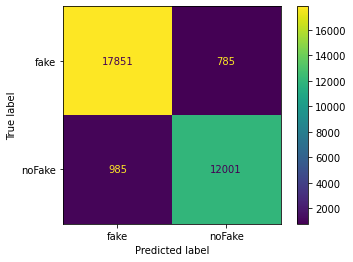

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m3.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.59 s, sys: 1.38 s, total: 2.96 s
Wall time: 6.2 s
CPU times: user 269 ms, sys: 409 ms, total: 678 ms
Wall time: 4.79 s
CPU times: user 307 ms, sys: 907 ms, total: 1.21 s
Wall time: 5.92 s
CPU times: user 1.24 ms, sys: 126 µs, total: 1.37 ms
Wall time: 3.13 ms
CPU times: user 781 µs, sys: 0 ns, total: 781 µs
Wall time: 6.59 ms
CPU times: user 0 ns, sys: 695 µs, total: 695 µs
Wall time: 1.69 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9430459806463855
precision: 0.9417956499275112
recall: 0.9403915495105979
f1: 0.9430459806463855


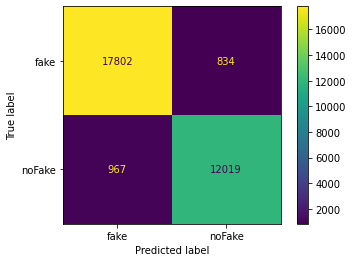

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m3.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.62 s, sys: 1.35 s, total: 2.97 s
Wall time: 6.25 s
CPU times: user 227 ms, sys: 465 ms, total: 691 ms
Wall time: 9.01 s
CPU times: user 237 ms, sys: 862 ms, total: 1.1 s
Wall time: 3.86 s
CPU times: user 1.85 ms, sys: 1.28 ms, total: 3.13 ms
Wall time: 8.95 ms
CPU times: user 2.06 ms, sys: 5 µs, total: 2.06 ms
Wall time: 2.68 ms
CPU times: user 669 µs, sys: 1.15 ms, total: 1.82 ms
Wall time: 2.9 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9361204224906711
precision: 0.9349392336761504
recall: 0.9328582290826712
f1: 0.9361204224906711


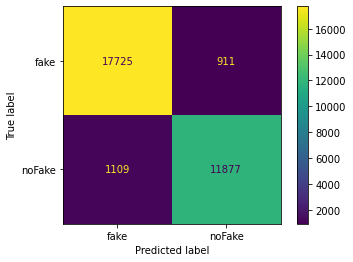

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')
